# gqrs detection

In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

Max and Min Values

In [2]:
t0 = 0
tf = 20000

Read the waveform info

In [3]:
folder = "p05/p050140"
waveform = "p050140-2188-07-26-05-51"
sig, fields = wfdb.srdsamp(waveform,pbdir='mimic3wdb/matched/'+folder, sampto=10000000)

In [4]:
print(sig)
print("signame: " + str(fields['signame']))
print("units: " + str(fields['units']))
print("fs: " + str(fields['fs']))
print("comments: " + str(fields['comments']))
print("fields: " + str(fields))

[[         nan          nan          nan ...,          nan          nan
           nan]
 [         nan          nan          nan ...,          nan          nan
           nan]
 [         nan          nan          nan ...,          nan          nan
           nan]
 ..., 
 [         nan   0.54330709          nan ..., -62.5                 nan
           nan]
 [         nan   0.55905512          nan ..., -65.625               nan
           nan]
 [         nan   0.53543307          nan ..., -67.5                 nan
           nan]]
signame: ['aVR', 'II', 'I', 'III', 'ABP', 'CVP', 'PLETH']
units: ['mV', 'mV', 'mV', 'mV', 'mmHg', 'mmHg', 'NU']
fs: 125
comments: ['Location: micu']
fields: {'comments': ['Location: micu'], 'fs': 125, 'signame': ['aVR', 'II', 'I', 'III', 'ABP', 'CVP', 'PLETH'], 'units': ['mV', 'mV', 'mV', 'mV', 'mmHg', 'mmHg', 'NU']}


In [5]:
signalII = None
try:
    signalII = fields['signame'].index("II")
except ValueError:
    print("List does not contain value")
if(signalII!=None):
    print("List contain value")

List contain value


In [6]:
#array = wfdb.processing.normalize(x=sig[:, signalII], lb=-2, ub=2)
array = sig[:, signalII]
array = array[~np.isnan(sig[:, signalII])]
arrayNun = np.trim_zeros(array)
array = np.nan_to_num(array)

chek fields

In [7]:
fs = fields['fs']
fs

125

Create Numpy Array

In [8]:
npArray = np.array(array)
npArray

array([ 0.51968504,  0.48818898,  0.45669291, ...,  0.54330709,
        0.55905512,  0.53543307])

check sig:

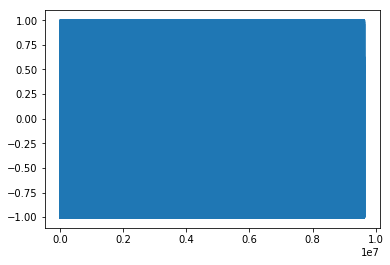

In [9]:
plt.plot(npArray)
plt.show()

In [10]:
len(np.array(npArray))

9640766

In [11]:
from QRSDetectorOffline import QRSDetectorOffline

In [12]:
sha = np.arange(npArray.shape[0])

In [13]:
test = np.stack((sha, np.nan_to_num(npArray))).T

qrs peaks indices
[    423     494     560 ..., 9640143 9640224 9640546]
noise peaks indices
[]


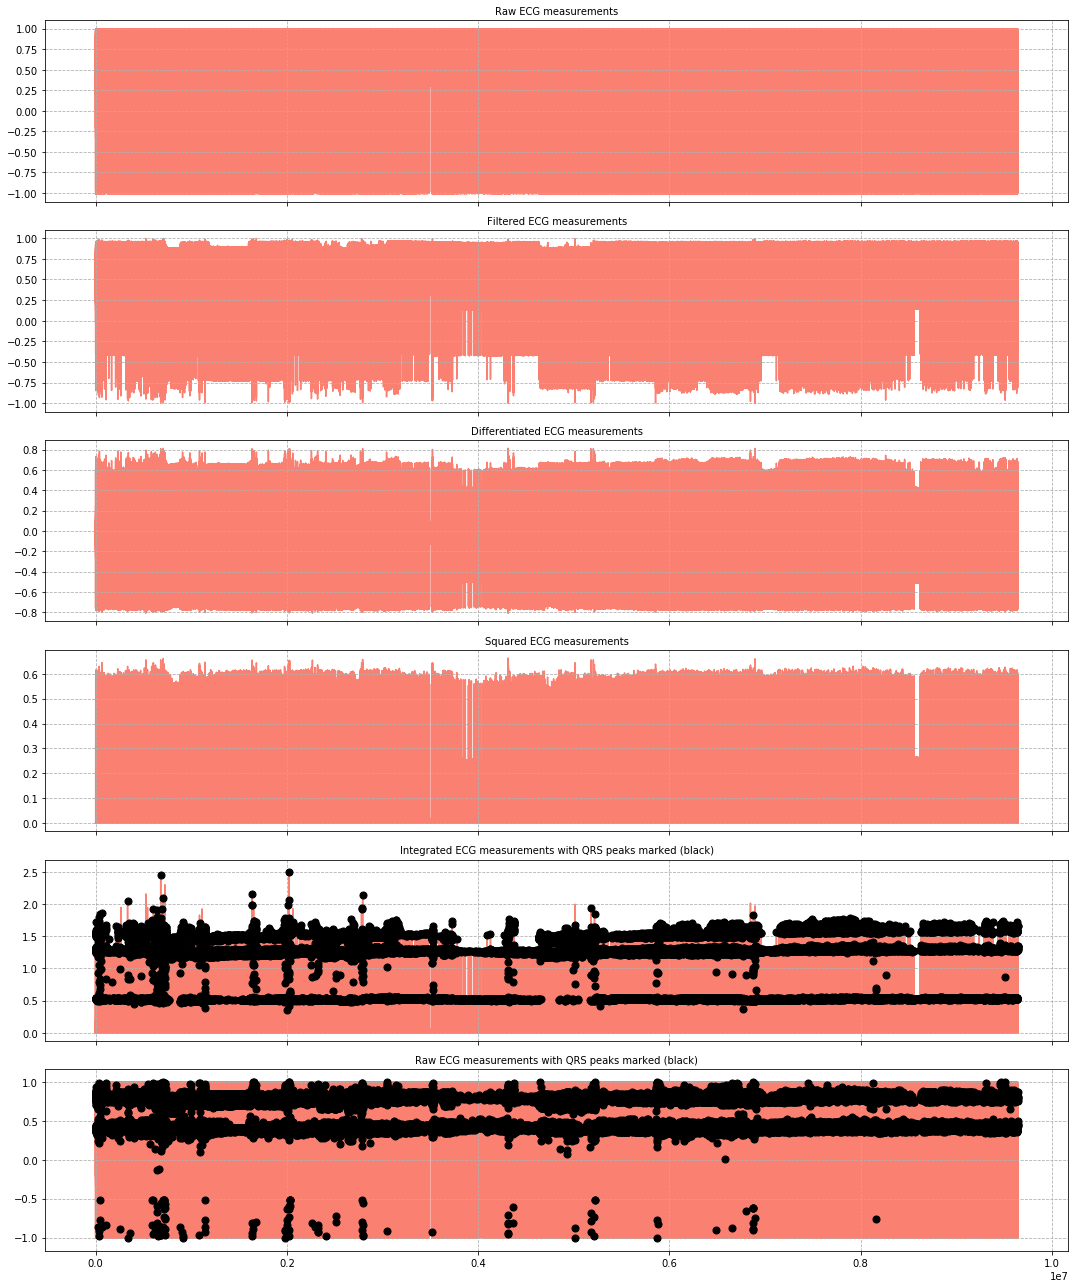

In [14]:
ecg_data_path = 'ecg_data/'+waveform+'.csv'
np.savetxt(ecg_data_path, test, delimiter=',')
qrs_detector = QRSDetectorOffline(ecg_data_path=ecg_data_path, verbose=True,log_data=True, plot_data=True, 
                                  show_plot=True,signal_frequency=fs)